In [1]:
import pandas as pd
from ast import literal_eval
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel
from gensim import models
import matplotlib.pyplot as plt

In [2]:
tokenized_doc = pd.read_csv("tokenized.csv")

In [3]:
tokenized_doc["Content"] = tokenized_doc["Content"].apply(literal_eval)

In [4]:
dictionary = corpora.Dictionary(tokenized_doc["Content"])

In [5]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_doc["Content"]]

In [6]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [7]:
lsamodel = LsiModel(corpus_tfidf, num_topics=5, id2word = dictionary,chunksize=2000)  # train model

In [8]:
corpus_lsi = lsamodel[corpus_tfidf]

In [9]:
cm = CoherenceModel(model=lsamodel,corpus=corpus_lsi, coherence='u_mass')
cm.get_coherence()

0.0

In [10]:
cm2 = CoherenceModel(model=lsamodel,texts=tokenized_doc["Content"], coherence='c_v')
cm2.get_coherence()

0.3811803962395501

In [11]:
print(lsamodel.print_topics(num_topics=5, num_words=10))

[(0, '0.146*"feel" + 0.132*"want" + 0.121*"know" + 0.121*"like" + 0.119*"tell" + 0.119*"love" + 0.110*"time" + 0.110*"friends" + 0.108*"life" + 0.107*"think"'), (1, '-0.302*"love" + -0.187*"friend" + 0.177*"work" + 0.162*"parent" + -0.152*"someone" + -0.147*"relationship" + -0.145*"feel" + -0.143*"friends" + -0.142*"date" + 0.137*"home"'), (2, '0.281*"hate" + -0.258*"friend" + 0.203*"people" + 0.201*"tire" + 0.184*"life" + -0.166*"say" + -0.158*"tell" + 0.151*"feel" + -0.144*"girl" + -0.139*"shes"'), (3, '-0.410*"love" + 0.296*"school" + 0.267*"friends" + 0.180*"people" + 0.179*"class" + 0.175*"friend" + -0.139*"mother" + 0.129*"college" + 0.128*"group" + -0.114*"miss"'), (4, '-0.530*"steal" + -0.212*"women" + -0.132*"people" + 0.123*"college" + -0.121*"reddit" + 0.114*"school" + -0.112*"hate" + -0.112*"black" + 0.109*"year" + -0.108*"porn"')]


## Tunning the number of topics

In [12]:
start,stop,step=2,22,2
coherence_values = []
model_list = []

for num_topics in range(start, stop, step):
    # generate LSA model
    model = LsiModel(corpus_tfidf, num_topics=num_topics, id2word = dictionary,chunksize=2000)  # train model
    #corpus_lsi = model[corpus_tfidf]
    model_list.append(model)
    
    cm = CoherenceModel(model=model,texts=tokenized_doc["Content"], coherence='c_v')
    score = cm.get_coherence()
    coherence_values.append(score)
    print(score)

0.35933976994229255
0.3772216413076149
0.3789622886710375
0.38899126193683464
0.36646803381259724
0.36321467021797865
0.348721394269761
0.34544021918336254
0.3509488280027761
0.33239277288125507


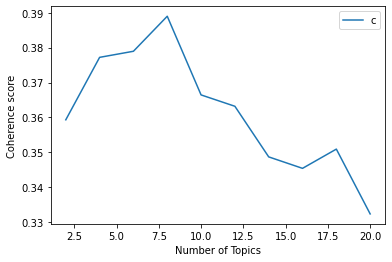

In [13]:
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [15]:
import numpy as np
n = np.argmax(coherence_values)
n

3

In [16]:
opt = model_list[n]

In [17]:
opt.get_topics()

array([[ 4.24143238e-03,  6.97611876e-03,  1.84262558e-02, ...,
         1.38777655e-06,  1.38777655e-06,  1.38777655e-06],
       [ 2.47155591e-03,  5.18142632e-03,  1.98440960e-02, ...,
        -4.54510826e-08, -4.54510826e-08, -4.54510826e-08],
       [ 9.01709370e-04,  3.17322282e-03,  2.93496720e-03, ...,
        -1.90655996e-06, -1.90655996e-06, -1.90655996e-06],
       ...,
       [ 2.14752962e-03, -2.98518656e-03,  7.37499505e-03, ...,
         3.17643359e-06,  3.17643359e-06,  3.17643359e-06],
       [ 2.43805093e-03,  4.36094689e-03,  8.55131745e-03, ...,
         3.40179565e-06,  3.40179565e-06,  3.40179565e-06],
       [ 6.22280847e-04,  1.07118490e-03,  2.34818137e-03, ...,
        -8.96159923e-07, -8.96159923e-07, -8.96159923e-07]])

In [22]:
print(opt.print_topics(num_topics=8, num_words=10))

[(0, '0.146*"feel" + 0.132*"want" + 0.121*"know" + 0.121*"like" + 0.119*"tell" + 0.119*"love" + 0.110*"time" + 0.110*"friends" + 0.108*"life" + 0.107*"think"'), (1, '-0.291*"love" + -0.215*"friend" + 0.178*"work" + 0.166*"parent" + -0.160*"relationship" + -0.160*"date" + -0.157*"friends" + -0.146*"girl" + -0.145*"talk" + -0.145*"someone"'), (2, '0.275*"hate" + -0.253*"friend" + 0.205*"people" + 0.187*"life" + 0.175*"tire" + -0.164*"say" + 0.164*"feel" + -0.150*"tell" + -0.135*"girl" + -0.129*"shes"'), (3, '-0.413*"love" + 0.262*"school" + 0.230*"friends" + 0.213*"people" + 0.161*"class" + -0.142*"miss" + -0.134*"mother" + 0.126*"friend" + 0.120*"group" + -0.118*"sister"'), (4, '0.237*"school" + 0.233*"miss" + -0.182*"hate" + 0.178*"college" + -0.158*"women" + 0.156*"love" + 0.154*"friends" + 0.148*"year" + -0.145*"people" + -0.135*"say"'), (5, '0.296*"hate" + 0.249*"parent" + 0.242*"school" + 0.218*"sister" + -0.208*"work" + 0.206*"brother" + 0.186*"mother" + 0.184*"friends" + 0.163*"f

In [23]:
from wordcloud import WordCloud

def get_word_cloud_text(weights, id2token):
    d = {f'{id2token[i]}': int(w * 100.0) for i, w in enumerate(weights)}
    return d

def create_word_cloud(d):
    wc = WordCloud(background_color='black')
    wc.generate_from_frequencies(d)
    return wc

def plot_word_cloud(w, id2token):
    wc_texts = [get_word_cloud_text(w[r], id2token) for r in range(w.shape[0])]
    clouds = [create_word_cloud(text) for text in wc_texts]

    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    for ax, cloud in zip(axes, clouds):
        _ = ax.imshow(cloud, interpolation='bilinear')
        _ = ax.grid(False)
        _ = ax.axis('off')

    plt.tight_layout()

In [24]:
from sklearn import preprocessing
w = opt.get_topics().copy()
w[w < 0] = 0.0
w = preprocessing.minmax_scale(w.T).T
w

array([[2.90377821e-02, 4.77600486e-02, 1.26150214e-01, ...,
        9.50102452e-06, 9.50102452e-06, 9.50102452e-06],
       [1.39223052e-02, 2.91870388e-02, 1.11782039e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28181093e-03, 1.15490841e-02, 1.06819423e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.25152459e-03, 0.00000000e+00, 2.49030130e-02, ...,
        1.07258061e-05, 1.07258061e-05, 1.07258061e-05],
       [8.51421686e-03, 1.52293978e-02, 2.98631052e-02, ...,
        1.18798281e-05, 1.18798281e-05, 1.18798281e-05],
       [8.82769910e-03, 1.51958686e-02, 3.33113877e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

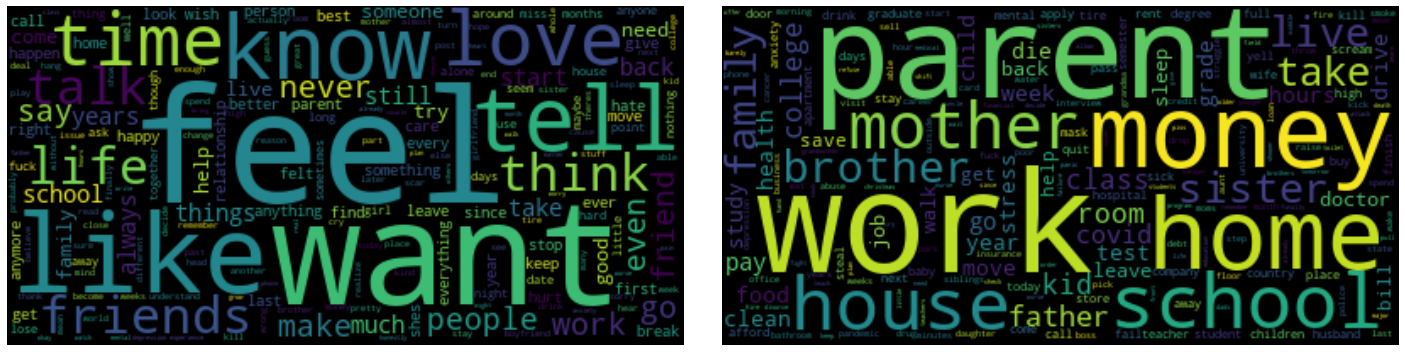

In [25]:
plot_word_cloud(w, opt.id2word.id2token)